<a href="https://colab.research.google.com/github/Nanangk/Dicoding_Course_Pengembangan_Machine_Learning/blob/master/Chessman_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#download dataset
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2020-08-05 17:29:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  12.1MB/s    in 8.0s    

2020-08-05 17:30:08 (7.24 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [4]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Bishop', 'Queen', 'Rook', 'Knight', 'King', 'Pawn']

In [6]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('total Rook images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('total Queen images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('total Bishop images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))

total pawn images : 107
total King images : 76
total Knight images : 106
total Rook images : 102
total Queen images : 78
total Bishop images : 87


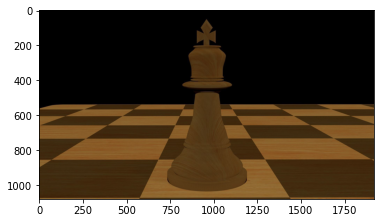

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
    
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), 

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)       

In [16]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
56/56 - 35s - loss: 1.8908 - accuracy: 0.1991 - val_loss: 1.7885 - val_accuracy: 0.1927
Epoch 2/50
56/56 - 34s - loss: 1.7868 - accuracy: 0.1787 - val_loss: 1.7847 - val_accuracy: 0.2110
Epoch 3/50
56/56 - 34s - loss: 1.7762 - accuracy: 0.1855 - val_loss: 1.7707 - val_accuracy: 0.2385
Epoch 4/50
56/56 - 34s - loss: 1.7701 - accuracy: 0.2262 - val_loss: 1.7607 - val_accuracy: 0.2936
Epoch 5/50
56/56 - 34s - loss: 1.7503 - accuracy: 0.2534 - val_loss: 1.7416 - val_accuracy: 0.2844
Epoch 6/50
56/56 - 34s - loss: 1.7143 - accuracy: 0.3009 - val_loss: 1.7137 - val_accuracy: 0.2385
Epoch 7/50
56/56 - 34s - loss: 1.6600 - accuracy: 0.3077 - val_loss: 1.6997 - val_accuracy: 0.2844
Epoch 8/50
56/56 - 35s - loss: 1.5866 - accuracy: 0.3869 - val_loss: 1.7020 - val_accuracy: 0.2661
Epoch 9/50
56/56 - 34s - loss: 1.5288 - accuracy: 0.3597 - val_loss: 1.6175 - val_accuracy: 0.2844
Epoch 10/50
56/56 - 34s - loss: 1.5102 - accuracy: 0.3824 - val_loss: 1.6924 - val_accuracy: 0.2477
Epoch 11/

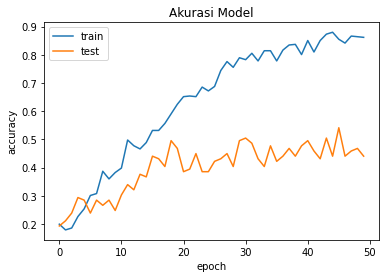

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

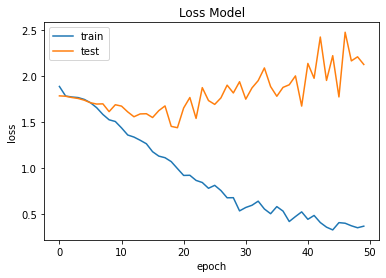

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#with transfer learning
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 3s 0us/step


In [21]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [23]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=1,
                    batch_size = 256)

Epoch 1/50
56/56 [==============================] - 134s 2s/step - loss: 0.4267 - accuracy: 0.9050 - val_loss: 1.5684 - val_accuracy: 0.7431
Epoch 2/50
56/56 [==============================] - 132s 2s/step - loss: 0.9001 - accuracy: 0.8416 - val_loss: 2.1176 - val_accuracy: 0.6606
Epoch 3/50
56/56 [==============================] - 134s 2s/step - loss: 0.6715 - accuracy: 0.8756 - val_loss: 2.2294 - val_accuracy: 0.6789
Epoch 4/50
56/56 [==============================] - 131s 2s/step - loss: 0.3300 - accuracy: 0.9276 - val_loss: 1.9719 - val_accuracy: 0.7339
Epoch 5/50
56/56 [==============================] - 131s 2s/step - loss: 0.5572 - accuracy: 0.8756 - val_loss: 1.9807 - val_accuracy: 0.6881
Epoch 6/50
56/56 [==============================] - 132s 2s/step - loss: 0.7501 - accuracy: 0.8665 - val_loss: 2.3402 - val_accuracy: 0.6330
Epoch 7/50
56/56 [==============================] - 132s 2s/step - loss: 0.4096 - accuracy: 0.9231 - val_loss: 1.5645 - val_accuracy: 0.7248
Epoch 8/50
56